# HeadBrainDataset linearRegression Problem :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('headbrain.csv')
data.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gender       237 non-null    int64
 1   AgeRange     237 non-null    int64
 2   HeadSize     237 non-null    int64
 3   BrainWeight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [4]:
data.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

In [5]:
data.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

In [6]:
data.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

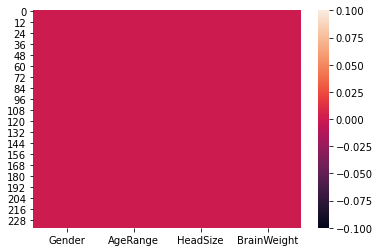

In [7]:
sns.heatmap(data.isnull())

In [8]:
data.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


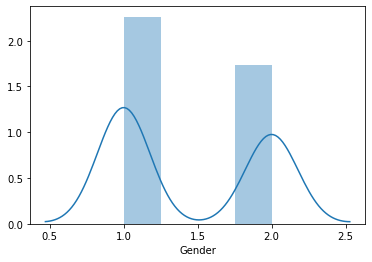

In [9]:
sns.distplot(data['Gender'])

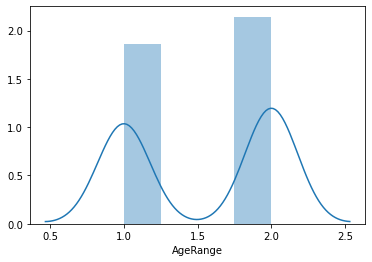

In [10]:
sns.distplot(data['AgeRange'])

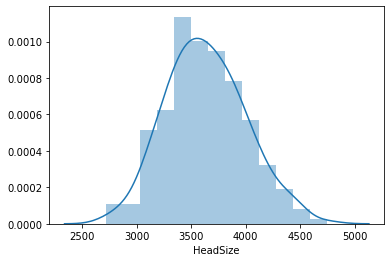

In [11]:
sns.distplot(data['HeadSize'])

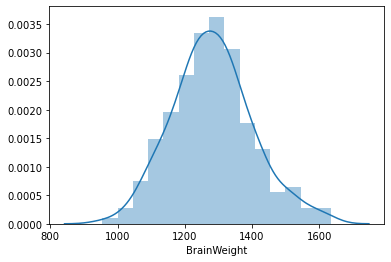

In [12]:
sns.distplot(data['BrainWeight'])

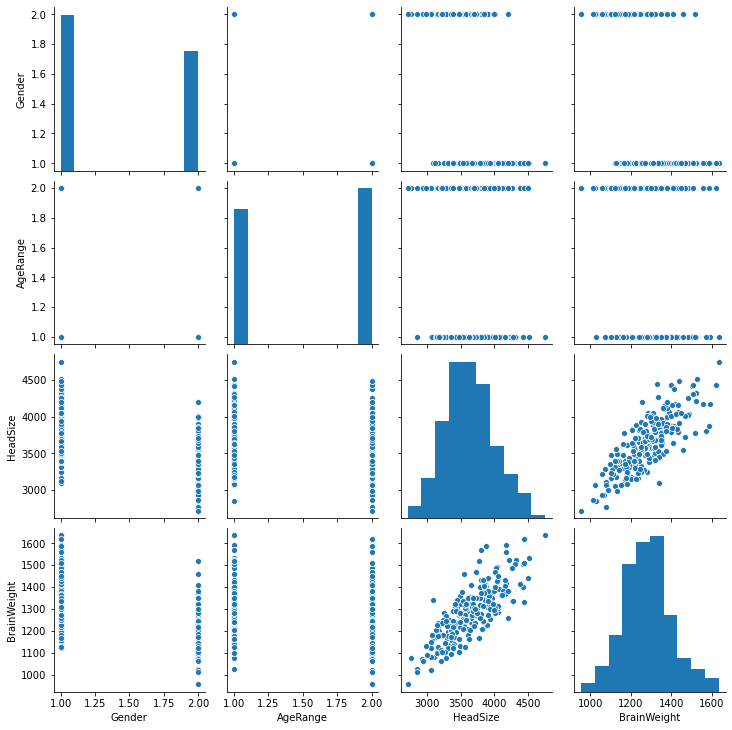

In [13]:
sns.pairplot(data)

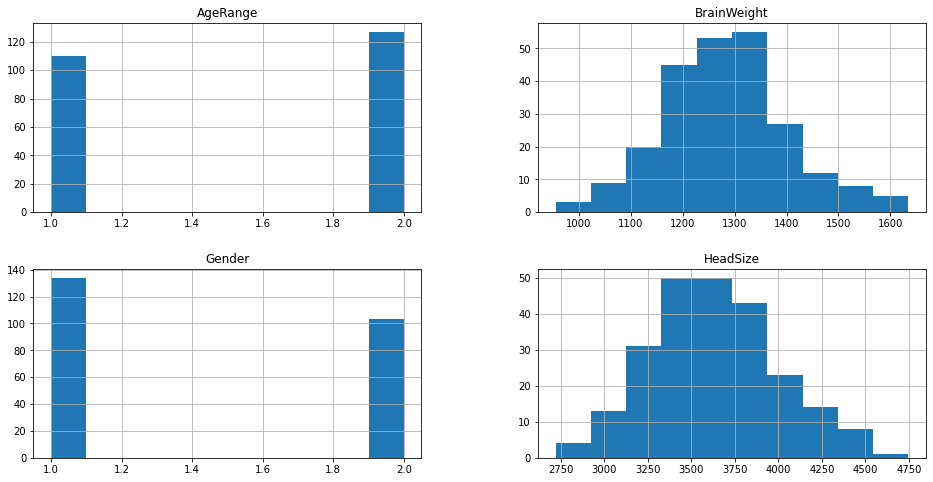

In [14]:
data.hist(figsize=(16,8))
plt.show()

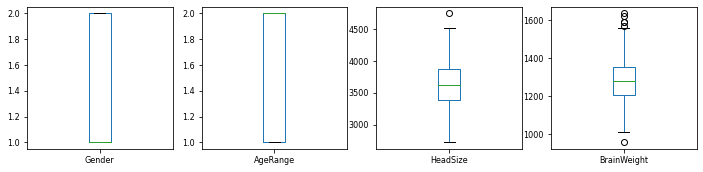

In [15]:
data.plot(kind='box',subplots=True,layout=(4,4),fontsize=8,figsize=(12,12))
plt.show()

In [16]:
data.skew()

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

In [17]:
dfr=data.corr()
dfr

,Gender,AgeRange,HeadSize,BrainWeight
Gender,1.000000,-0.088652,-0.514050,-0.465266
AgeRange,-0.088652,1.000000,-0.105428,-0.169438
HeadSize,-0.514050,-0.105428,1.000000,0.799570
BrainWeight,-0.465266,-0.169438,0.799570,1.000000


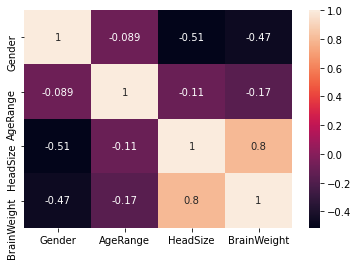

In [18]:
sns.heatmap(dfr,annot=True)

In [19]:
X=data.drop('BrainWeight',axis=1)
y=data['BrainWeight']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(189, 3)
(48, 3)
(189,)
(48,)


In [22]:
## Cross validation :
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),X,y,cv=10,scoring='r2').mean()

0.46747724149658626

In [23]:
lrg=linear_model.LinearRegression()
lrg.fit(X_train,y_train)
predm=lrg.predict(X_test)
predm

array([1242.28994947, 1359.42439666, 1247.9247648 , 1215.51057307,
       1336.86029246, 1163.71797457, 1385.70785868, 1070.38741752,
       1260.14286707, 1198.5812842 , 1376.96115705, 1202.64725323,
       1337.35620684, 1274.45618401, 1265.84588242, 1255.77829168,
       1575.39510821, 1275.69596996, 1195.17808357, 1495.30493619,
       1203.78838517, 1217.49423058, 1259.18149231, 1161.88362024,
       1252.05893385, 1170.56212185, 1269.34773705, 1473.13809236,
       1216.25444463, 1495.056979  , 1379.16231776, 1286.95269747,
       1191.39052572, 1165.7698321 , 1473.13809236, 1333.29023781,
       1239.59287438, 1120.72272688, 1213.52691556, 1380.65006089,
       1180.30065224, 1398.60163251, 1265.44862205, 1341.47282504,
       1284.47312558, 1216.53285581, 1225.03160026, 1149.30600362])

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('r2 score is:',r2_score(y_test,predm))
print('mse score is:',np.sqrt(mean_squared_error(y_test,predm)))

r2 score is: 0.7345676369778606
mse score is: 65.95452567714393


In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
predm=rfr.predict(X_test)
predm
print('r2 score is:',r2_score(y_test,predm))
print('mse score is:',np.sqrt(mean_squared_error(y_test,predm)))

r2 score is: 0.6065689827755232
mse score is: 80.29748862614989


In [26]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
predm=dtr.predict(X_test)
predm
print('r2 score is:',r2_score(y_test,predm))
print('mse score is:',np.sqrt(mean_squared_error(y_test,predm)))

r2 score is: 0.43248824835832167
mse score is: 96.43953200494771


In [27]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
predm=svr.predict(X_test)
predm
print('r2 score is:',r2_score(y_test,predm))
print('mse score is:',np.sqrt(mean_squared_error(y_test,predm)))

r2 score is: 0.04138619769684304
mse score is: 125.33994608716769


In [28]:
import joblib
joblib.dump(dtr,'headbrain.pkl')

['headbrain.pkl']